<a href="https://colab.research.google.com/github/ashleyak7/MSCI-151_ashley/blob/main/CW4_AAK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

excel_file_path = '/content/sample_data/MSCI151 Data.xlsx'
df = pd.read_excel(excel_file_path)
print(df.columns)

Index(['id', 'Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size',
       'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assuming df is already loaded from 'MSCI151 Data.xlsx'

# Define features (X) and target (y)
feature_cols = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender']
X = df[feature_cols]
y = df['Profitability']

# Split data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Evaluation for 'Profitability':")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Random Forest Model Evaluation for 'Profitability':
Mean Absolute Error (MAE): 8.49
Mean Squared Error (MSE): 113.68
R-squared (R2): -1.47


In [ ]:
df = pd.read_excel('/content/sample_data/MSCI151 coursework 4 Data.new.xlsx')
print(df.columns)

Index(['id', 'Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size',
       'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender',
       'Marketing', 'Product_sentiment', 'Politicans', 'PoB'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assuming df is already loaded from 'MSCI151 coursework 4 Data.new.xlsx'

# Define features (X) and target (y)
feature_cols_new_data = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'Politicans', 'PoB']
X_new_data = df[feature_cols_new_data]
y_new_data = df['Profitability']

# Split data into training and testing sets (80/20 rule)
X_train_new_data, X_test_new_data, y_train_new_data, y_test_new_data = train_test_split(
    X_new_data, y_new_data, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model
model_new_data = RandomForestRegressor(n_estimators=100, random_state=42)
model_new_data.fit(X_train_new_data, y_train_new_data)

# Make predictions on the test set
y_pred_new_data = model_new_data.predict(X_test_new_data)

# Evaluate the model
mae_new_data = mean_absolute_error(y_test_new_data, y_pred_new_data)
mse_new_data = mean_squared_error(y_test_new_data, y_pred_new_data)
r2_new_data = r2_score(y_test_new_data, y_pred_new_data)

print(f"Random Forest Model Evaluation for 'Profitability' (New Data):")
print(f"Mean Absolute Error (MAE): {mae_new_data:.2f}")
print(f"Mean Squared Error (MSE): {mse_new_data:.2f}")
print(f"R-squared (R2): {r2_new_data:.2f}")

Random Forest Model Evaluation for 'Profitability' (New Data):
Mean Absolute Error (MAE): 8.33
Mean Squared Error (MSE): 112.53
R-squared (R2): -1.44


In [ ]:
# Get feature importances from the Random Forest model trained on new data
feature_importances_new_data = model_new_data.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_new_data = pd.Series(feature_importances_new_data, index=X_new_data.columns)

# Sort the features by importance
sorted_feature_importances_new_data = feature_importance_series_new_data.sort_values(ascending=False)

# Print the feature importance scores
print("Random Forest Feature Importances (New Data):")
display(sorted_feature_importances_new_data)

Random Forest Feature Importances (New Data):


,0
debt,0.295454
CEO Gender,0.154521
Firm Size,0.141393
RnD,0.108190
Product_sentiment,0.061330
Politicans,0.050223
Firm Age,0.044568
Marketing,0.044484
CEO Experience,0.035701
foreign sales,0.033287


In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd

# Load the dataframe
excel_file_path = '/content/sample_data/MSCI151 coursework 4 Data.new.xlsx'
df_new = pd.read_excel(excel_file_path)

# Define the features (X) and the target variable (y)
feature_cols_lasso = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_lasso = df_new[feature_cols_lasso]
y_lasso = df_new['Profitability']

# Initialize and fit the LASSO model
# You might need to tune the alpha parameter based on your data
lasso = Lasso(alpha=0.1) # alpha is the regularization strength
lasso.fit(X_lasso, y_lasso)

# Get the coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=X_lasso.columns)

# Print the coefficients
print("LASSO Coefficients:")
print(lasso_coefficients)

LASSO Coefficients:
debt                -0.189645
RnD                  0.024599
Firm Age            -2.482502
Firm Size            0.491453
CEO Experience       1.945461
foreign sales       -0.020908
CEO education        2.205056
CEO Gender           9.904784
Marketing           -3.889431
Product_sentiment   -0.000000
PoB                 -0.000000
dtype: float64


In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd

# Assuming df_new is already loaded from 'MSCI151 coursework 4 Data.new.xlsx'

# Define the reduced set of features (X)
feature_cols_reduced_lasso = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing']
X_reduced_lasso = df_new[feature_cols_reduced_lasso]
y_reduced_lasso = df_new['Profitability']

# Initialize and fit the LASSO model with the reduced feature set
# You might need to tune the alpha parameter based on your data
lasso_reduced = Lasso(alpha=0.1) # alpha is the regularization strength
lasso_reduced.fit(X_reduced_lasso, y_reduced_lasso)

# Get the coefficients
lasso_coefficients_reduced = pd.Series(lasso_reduced.coef_, index=X_reduced_lasso.columns)

# Print the coefficients
print("LASSO Coefficients (Reduced Features - Product_sentiment and PoB removed):")
print(lasso_coefficients_reduced)

LASSO Coefficients (Reduced Features - Product_sentiment and PoB removed):
debt             -0.189645
RnD               0.024599
Firm Age         -2.482502
Firm Size         0.491453
CEO Experience    1.945461
foreign sales    -0.020908
CEO education     2.205056
CEO Gender        9.904784
Marketing        -3.889431
dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assuming df_new is already loaded from 'MSCI151 coursework 4 Data.new.xlsx'

# Define features (X) and target (y)
feature_cols_rf = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing']
X_rf = df_new[feature_cols_rf]
y_rf = df_new['Profitability']

# Split data into training and testing sets (80/20 rule)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_rf)

# Evaluate the model
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print(f"Random Forest Model Evaluation for 'Profitability' (Reduced Features):")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Random Forest Model Evaluation for 'Profitability' (Reduced Features):
Mean Absolute Error (MAE): 8.54
Mean Squared Error (MSE): 115.23
R-squared (R2): -1.50


In [ ]:
# Get feature importances from the Random Forest model
feature_importances_rf = model_rf.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_rf = pd.Series(feature_importances_rf, index=X_rf.columns)

# Sort the features by importance
sorted_feature_importances_rf = feature_importance_series_rf.sort_values(ascending=False)

# Print the feature importance scores
print("Random Forest Feature Importances (Reduced Features):")
print(sorted_feature_importances_rf)

Random Forest Feature Importances (Reduced Features):
debt              0.320011
Firm Size         0.158812
CEO Gender        0.155239
RnD               0.122000
foreign sales     0.058545
Marketing         0.054101
CEO Experience    0.053045
Firm Age          0.052659
CEO education     0.025588
dtype: float64


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataframe
excel_file_path = '/content/sample_data/MSCI151 coursework 4 Data.new.xlsx'
df_new = pd.read_excel(excel_file_path)

# Define the features (X) and the target variable (y)
feature_cols_ols = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_ols = df_new[feature_cols_ols]
y_ols = df_new['Profitability']

# Add a constant (intercept) to the features
X_ols = sm.add_constant(X_ols)

# Create and fit the OLS model with robust standard errors
model_ols = sm.OLS(y_ols, X_ols)
results_ols = model_ols.fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the summary of the regression results
print("OLS Regression Results (with Robust Standard Errors):")
print(results_ols.summary())

OLS Regression Results (with Robust Standard Errors):
                            OLS Regression Results                            
Dep. Variable:          Profitability   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4.859
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           4.35e-06
Time:                        13:45:51   Log-Likelihood:                -465.15
No. Observations:                 122   AIC:                             954.3
Df Residuals:                     110   BIC:                             988.0
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming df_new and results_ols are available from previous steps

# Get OLS coefficients and p-values from the previous model
ols_pvalues = results_ols.pvalues

# Filter: keep only variables with p <= 0.1
significant_vars = ols_pvalues[ols_pvalues <= 0.1].index.tolist()

# Remove the 'const' if it's included, as it's added separately
if 'const' in significant_vars:
    significant_vars.remove('const')

# Define the reduced set of features (X) based on the significant variables
X_ols_reduced_pvalue = df_new[significant_vars]
y_ols_reduced_pvalue = df_new['Profitability'] # Target variable remains the same

# Add a constant (intercept) to the features
X_ols_reduced_pvalue = sm.add_constant(X_ols_reduced_pvalue)

# Create and fit the OLS model with robust standard errors using the reduced feature set
model_ols_reduced_pvalue = sm.OLS(y_ols_reduced_pvalue, X_ols_reduced_pvalue)
results_ols_reduced_pvalue = model_ols_reduced_pvalue.fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the summary of the regression results
print("OLS Regression Results for 'Profitability' (Features with P <= 0.1, with Robust Standard Errors):")
print(results_ols_reduced_pvalue.summary())

OLS Regression Results for 'Profitability' (Features with P <= 0.1, with Robust Standard Errors):
                            OLS Regression Results                            
Dep. Variable:          Profitability   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     11.62
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           1.00e-06
Time:                        13:49:22   Log-Likelihood:                -468.45
No. Observations:                 122   AIC:                             944.9
Df Residuals:                     118   BIC:                             956.1
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load the dataframe (ensure the correct path is used)
excel_file_path = '/content/MSCI151 coursework 4 new Data.new.xlsx' # Path that worked previously
df = pd.read_excel(excel_file_path)

# Define features (X) and target (y) with the specified features
feature_cols_new_simplified = ['debt', 'CEO Gender', 'Marketing']
X_new_simplified = df[feature_cols_new_simplified]
y_new_simplified = df['Profitability']

# Split data into training and testing sets (80/20 rule)
X_train_new_simplified, X_test_new_simplified, y_train_new_simplified, y_test_new_simplified = train_test_split(
    X_new_simplified, y_new_simplified, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model
model_new_simplified_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_new_simplified_rf.fit(X_train_new_simplified, y_train_new_simplified)

# Get feature importances from the simplified Random Forest model
feature_importances_new_simplified_rf = model_new_simplified_rf.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_new_simplified_rf = pd.Series(feature_importances_new_simplified_rf, index=X_new_simplified.columns)

# Sort the features by importance
sorted_feature_importances_new_simplified_rf = feature_importance_series_new_simplified_rf.sort_values(ascending=False)

print(f"Random Forest Feature Importances (Simplified Model - Features: {feature_cols_new_simplified}):")
display(sorted_feature_importances_new_simplified_rf)

Random Forest Feature Importances (Simplified Model - Features: ['debt', 'CEO Gender', 'Marketing']):


,0
debt,0.566176
Marketing,0.255524
CEO Gender,0.178300


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Assuming df_new is already loaded from 'MSCI151 coursework 4 Data.new.xlsx'

# Define the features for PCA
feature_cols_pca = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_pca = df_new[feature_cols_pca]

# Standardize the features
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
X_pca_transformed = pca.fit_transform(X_pca_scaled)

# Get the loading factors
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=feature_cols_pca)

# Display the loading factors
print("PCA Loading Factors:")
display(loading_factors)

PCA Loading Factors:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
debt,-0.137278,-0.264457,0.022901,0.199147,0.722276,0.296221,0.215842,-0.294717,-0.051103,0.254185,-0.246853
RnD,0.248985,0.035718,-0.381083,-0.424983,0.306896,0.225746,-0.435789,0.052962,-0.330938,-0.375934,-0.148950
Firm Age,0.404094,0.187400,-0.206086,0.427116,0.057615,-0.193697,0.049725,-0.367041,0.402574,-0.436375,-0.214877
Firm Size,0.296997,0.307233,0.013418,0.239870,-0.011418,0.430006,0.502840,0.509018,-0.220833,-0.107119,-0.049588
CEO Experience,0.142157,0.662708,-0.199195,0.106621,0.154872,-0.057999,-0.206587,-0.183443,-0.122456,0.539916,0.281742
foreign sales,-0.204697,0.382921,0.396491,-0.280492,0.082339,-0.163574,0.336616,-0.409492,-0.354229,-0.366229,0.038183
CEO education,0.516262,-0.285947,0.300485,-0.088410,0.049326,0.262396,-0.000283,-0.230399,0.070828,-0.044015,0.649829
CEO Gender,0.487960,0.037835,0.408698,-0.311446,-0.142420,-0.031440,-0.041835,-0.066371,0.053186,0.353246,-0.584288
Marketing,0.010582,-0.078730,0.393992,0.584490,-0.075232,-0.015253,-0.484383,0.003050,-0.487396,-0.105716,-0.087012
Product_sentiment,-0.189455,0.320349,0.446839,-0.056394,0.362265,0.140669,-0.314620,0.326805,0.521414,-0.168295,0.040387


In [ ]:
# Assuming max_loading_per_feature is available from the previous cell

print("Highest PCA Loading per Feature:")
display(max_loading_per_feature)

Highest PCA Loading per Feature:


,Highest Absolute Loading,Principal Component (PC)
debt,0.722276,PC5
PoB,0.720339,PC6
CEO Experience,0.662708,PC2
CEO education,0.649829,PC11
Marketing,0.584490,PC4
CEO Gender,0.584288,PC11
Product_sentiment,0.521414,PC9
Firm Size,0.509018,PC8
Firm Age,0.436375,PC10
RnD,0.435789,PC7


In [ ]:
# Find max loading per feature
abs_loading = loading_factors.abs()

max_loading_per_feature = pd.DataFrame({
    'Highest Absolute Loading': abs_loading.max(axis=1),
    'Principal Component (PC)': abs_loading.idxmax(axis=1)
}).sort_values(by='Highest Absolute Loading', ascending=False)

# Filter by loading strength (≥ 0.5) and store in important_pca_features
important_pca_features = max_loading_per_feature[max_loading_per_feature['Highest Absolute Loading'] >= 0.5]

print("Features with Highest PCA Loading >= 0.5:")
display(important_pca_features)

Features with Highest PCA Loading >= 0.5:


,Highest Absolute Loading,Principal Component (PC)
debt,0.722276,PC5
PoB,0.720339,PC6
CEO Experience,0.662708,PC2
CEO education,0.649829,PC11
Marketing,0.584490,PC4
CEO Gender,0.584288,PC11
Product_sentiment,0.521414,PC9
Firm Size,0.509018,PC8


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Re-run necessary steps to ensure 'pca' object is defined ---
excel_file_path = '/content/sample_data/MSCI151 coursework 4  Data.new.xlsx' # Corrected file path with double space
df = pd.read_excel(excel_file_path)

feature_cols = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'Politicans', 'PoB']
X = df[feature_cols]

scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X)

pca = PCA()
X_pca_transformed = pca.fit_transform(X_pca_scaled)
# --- End of re-run steps ---

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

pca_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_explained_variance
})

print("Explained Variance for Each Principal Component:")
display(pca_variance_df)

Explained Variance for Each Principal Component:


,Principal Component,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,0.172248,0.172248
1,PC2,0.132846,0.305094
2,PC3,0.111861,0.416956
3,PC4,0.107644,0.524600
4,PC5,0.099901,0.624501
5,PC6,0.086825,0.711326
6,PC7,0.073218,0.784545
7,PC8,0.068500,0.853045
8,PC9,0.056321,0.909365
9,PC10,0.046999,0.956365


In [ ]:
# Find max loading per feature
abs_loading = loading_factors.abs()

max_loading_per_feature = pd.DataFrame({
    'Highest Absolute Loading': abs_loading.max(axis=1),
    'Principal Component (PC)': abs_loading.idxmax(axis=1)
}).sort_values(by='Highest Absolute Loading', ascending=False)

# Filter by loading strength (≥ 0.5) and store in important_pca_features
important_pca_features = max_loading_per_feature[max_loading_per_feature['Highest Absolute Loading'] >= 0.7]

print("Features with Highest PCA Loading >= 0.7:")
display(important_pca_features)

Features with Highest PCA Loading >= 0.7:


,Highest Absolute Loading,Principal Component (PC)
debt,0.722276,PC5
PoB,0.720339,PC6


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load the dataframe (ensure the correct path is used)
excel_file_path = '/content/MSCI151 coursework 4 new Data.new.xlsx' # Path that worked previously
df = pd.read_excel(excel_file_path)

# Define features (X) and target (y) with the specified features
feature_cols_new_simplified = ['debt', 'PoB']
X_new_simplified = df[feature_cols_new_simplified]
y_new_simplified = df['Profitability']

# Split data into training and testing sets (80/20 rule)
X_train_new_simplified, X_test_new_simplified, y_train_new_simplified, y_test_new_simplified = train_test_split(
    X_new_simplified, y_new_simplified, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model
model_new_simplified_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_new_simplified_rf.fit(X_train_new_simplified, y_train_new_simplified)

# Get feature importances from the simplified Random Forest model
feature_importances_new_simplified_rf = model_new_simplified_rf.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_new_simplified_rf = pd.Series(feature_importances_new_simplified_rf, index=X_new_simplified.columns)

# Sort the features by importance
sorted_feature_importances_new_simplified_rf = feature_importance_series_new_simplified_rf.sort_values(ascending=False)

print(f"Random Forest Feature Importances (Simplified Model - Features: {feature_cols_new_simplified}):")
display(sorted_feature_importances_new_simplified_rf)

Random Forest Feature Importances (Simplified Model - Features: ['debt', 'PoB']):


,0
debt,0.950025
PoB,0.049975


In [ ]:
import pandas as pd

# Assuming sorted_feature_importances_new_data, lasso_coefficients, and results_ols are available from previous steps

# Combine feature importances/coefficients from different models into a single DataFrame
comparison_table_all = pd.DataFrame({
    'Random Forest Importance': sorted_feature_importances_new_data,
    'LASSO Coefficients': lasso_coefficients,
    'OLS Coefficients': results_ols.params[1:], # Exclude the constant
    'OLS P-values': results_ols.pvalues[1:] # Exclude the constant
}).fillna(0) # Fill NaN values with 0 where a feature wasn't used by a model

# Display the comparison table
print("Feature Importance/Coefficient Comparison (All Methods):")
display(comparison_table_all)

Feature Importance/Coefficient Comparison (All Methods):


,Random Forest Importance,LASSO Coefficients,OLS Coefficients,OLS P-values
CEO Experience,0.035701,1.945461,2.515558,0.267902
CEO Gender,0.154521,9.904784,10.452346,0.000125
CEO education,0.023244,2.205056,2.577793,0.315466
Firm Age,0.044568,-2.482502,-3.239771,0.275569
Firm Size,0.141393,0.491453,0.505903,0.522408
Marketing,0.044484,-3.889431,-4.975219,0.061662
PoB,0.007604,-0.000000,-0.029519,0.990309
Politicans,0.050223,0.000000,0.000000,0.000000
Product_sentiment,0.061330,-0.000000,-0.676783,0.847247
RnD,0.108190,0.024599,0.021200,0.234997


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# --- 1. Load Data and Define Features/Target ---
excel_file_path = '/content/MSCI151 coursework 4 Data.new.xlsx' # Corrected file path
df = pd.read_excel(excel_file_path)

feature_cols = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'Politicans', 'PoB']
X = df[feature_cols]
y = df['Profitability']

# --- 2. Random Forest Model and Feature Importance ---
# Split data for Random Forest (needed to train the model for feature importances)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_rf, y_train_rf)

rf_importance_series = pd.Series(model_rf.feature_importances_, index=X.columns)
mean_importance_rf = rf_importance_series.mean()
rf_important_features = rf_importance_series[rf_importance_series > mean_importance_rf].index.tolist()

# --- 3. LASSO Regression and Feature Selection ---
lasso = Lasso(alpha=0.1, random_state=42) # Using alpha=0.1 as in previous analysis
lasso.fit(X, y)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
lasso_important_features = lasso_coefficients[lasso_coefficients != 0].index.tolist()

# --- 4. OLS Regression and Statistical Significance ---
X_ols = sm.add_constant(X)
model_ols = sm.OLS(y, X_ols)
results_ols = model_ols.fit(cov_type='HC1') # Using robust standard errors as in previous analysis

ols_pvalues = results_ols.pvalues
ols_important_features = ols_pvalues[ols_pvalues < 0.1].index.tolist()
if 'const' in ols_important_features:
    ols_important_features.remove('const')

# --- 5. PCA and Loading Factors ---
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X)

pca = PCA()
X_pca_transformed = pca.fit_transform(X_pca_scaled)

loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)
abs_loading = loading_factors.abs()
max_loading_per_feature = pd.DataFrame({
    'Highest Absolute Loading': abs_loading.max(axis=1),
    'Principal Component (PC)': abs_loading.idxmax(axis=1)
})
pca_important_features = max_loading_per_feature[max_loading_per_feature['Highest Absolute Loading'] >= 0.5].index.tolist()

# --- 6. Create Comparison Table ---
all_features = sorted(list(set(rf_important_features + lasso_important_features + ols_important_features + pca_important_features)))

xai_comparison_table = pd.DataFrame(index=all_features)
xai_comparison_table['Random Forest (Importance > Mean)'] = xai_comparison_table.index.isin(rf_important_features)
xai_comparison_table['LASSO (Coef ≠ 0)'] = xai_comparison_table.index.isin(lasso_important_features)
xai_comparison_table['OLS (p < 0.1)'] = xai_comparison_table.index.isin(ols_important_features)
xai_comparison_table['PCA (|Loading| ≥ 0.5)'] = xai_comparison_table.index.isin(pca_important_features)

# Calculate Score
xai_comparison_table['Score'] = xai_comparison_table.sum(axis=1)

# Sort by Score in descending order
xai_comparison_table = xai_comparison_table.sort_values(by='Score', ascending=False)

print("Explainable AI (XAI) Comparison Table for 'Profitability':")
display(xai_comparison_table)

Explainable AI (XAI) Comparison Table for 'Profitability':


,Random Forest (Importance > Mean),LASSO (Coef ≠ 0),OLS (p < 0.1),PCA (|Loading| ≥ 0.5),Score
CEO Gender,True,True,True,True,4
debt,True,True,True,True,4
Firm Size,True,True,False,True,3
Marketing,False,True,True,True,3
foreign sales,False,True,False,True,2
CEO education,False,True,False,True,2
CEO Experience,False,True,False,True,2
Politicans,False,True,False,True,2
RnD,True,True,False,False,2
Firm Age,False,True,False,False,1


/tmp/ipython-input-438352166.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_xai_table.index, y=sorted_xai_table['Score'], palette='viridis')


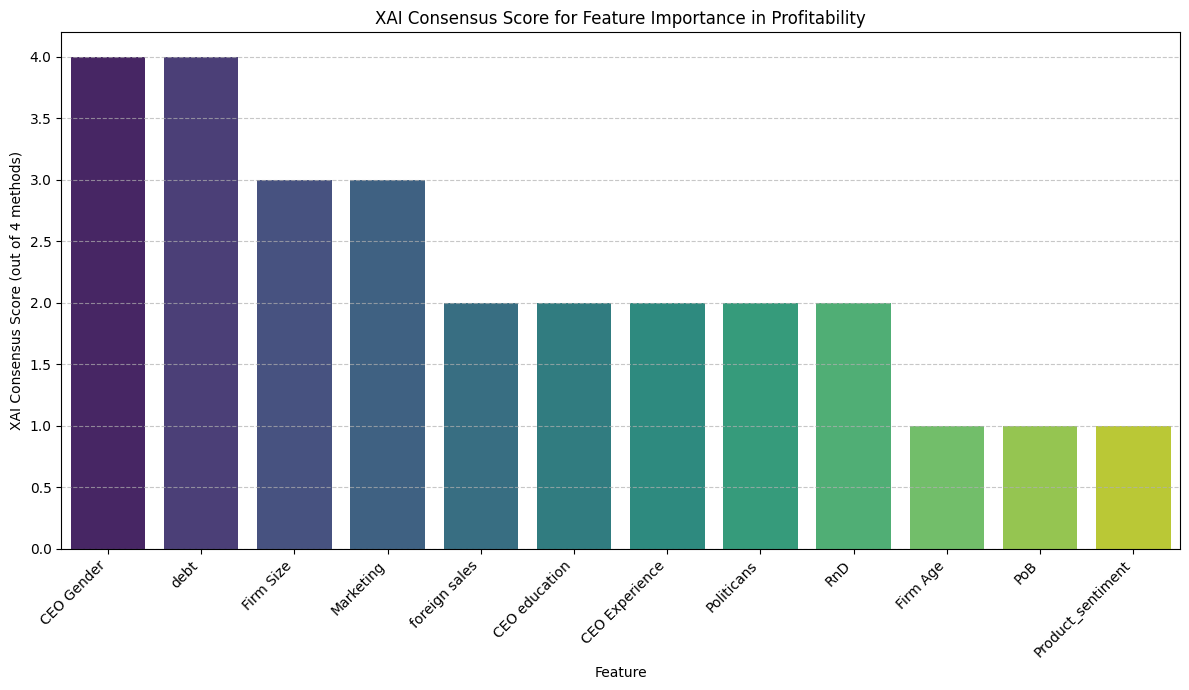

In [12]:
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# --- Recreate xai_comparison_table (copied from YMJlEUnRX6DF) ---
# 1. Load Data and Define Features/Target
excel_file_path = '/content/MSCI151 coursework 4 new Data.new.xlsx' # Corrected path
df = pd.read_excel(excel_file_path)

feature_cols = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'Politicans', 'PoB']
X = df[feature_cols]
y = df['Profitability']

# 2. Random Forest Model and Feature Importance
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_rf, y_train_rf)
rf_importance_series = pd.Series(model_rf.feature_importances_, index=X.columns)
mean_importance_rf = rf_importance_series.mean()
rf_important_features = rf_importance_series[rf_importance_series > mean_importance_rf].index.tolist()

# 3. LASSO Regression and Feature Selection
lasso = Lasso(alpha=0.1, random_state=42) # Using alpha=0.1 as in previous analysis
lasso.fit(X, y)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
lasso_important_features = lasso_coefficients[lasso_coefficients != 0].index.tolist()

# 4. OLS Regression and Statistical Significance
X_ols = sm.add_constant(X)
model_ols = sm.OLS(y, X_ols)
results_ols = model_ols.fit(cov_type='HC1') # Using robust standard errors as in previous analysis
ols_pvalues = results_ols.pvalues
ols_important_features = ols_pvalues[ols_pvalues < 0.1].index.tolist()
if 'const' in ols_important_features:
    ols_important_features.remove('const')

# 5. PCA and Loading Factors
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X)
pca = PCA()
X_pca_transformed = pca.fit_transform(X_pca_scaled)
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)
abs_loading = loading_factors.abs()
max_loading_per_feature = pd.DataFrame({
    'Highest Absolute Loading': abs_loading.max(axis=1),
    'Principal Component (PC)': abs_loading.idxmax(axis=1)
})
pca_important_features = max_loading_per_feature[max_loading_per_feature['Highest Absolute Loading'] >= 0.5].index.tolist()

# 6. Create Comparison Table
all_features = sorted(list(set(rf_important_features + lasso_important_features + ols_important_features + pca_important_features)))
xai_comparison_table = pd.DataFrame(index=all_features)
xai_comparison_table['Random Forest (Importance > Mean)'] = xai_comparison_table.index.isin(rf_important_features)
xai_comparison_table['LASSO (Coef ≠ 0)'] = xai_comparison_table.index.isin(lasso_important_features)
xai_comparison_table['OLS (p < 0.1)'] = xai_comparison_table.index.isin(ols_important_features)
xai_comparison_table['PCA (|Loading| ≥ 0.5)'] = xai_comparison_table.index.isin(pca_important_features)
xai_comparison_table['Score'] = xai_comparison_table.sum(axis=1)
# --- End of xai_comparison_table recreation ---

# Ensure the table is sorted by score for better visualization
sorted_xai_table = xai_comparison_table.sort_values(by='Score', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=sorted_xai_table.index, y=sorted_xai_table['Score'], palette='viridis')
plt.title('XAI Consensus Score for Feature Importance in Profitability')
plt.xlabel('Feature')
plt.ylabel('XAI Consensus Score (out of 4 methods)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load the dataframe (ensure the correct path is used)
excel_file_path = '/content/MSCI151 coursework 4 Data.new.xlsx'
df_simplified = pd.read_excel(excel_file_path)

# Define features (X) and target (y) using only the top-scoring features
simplified_feature_cols = ['CEO Gender', 'debt']
X_simplified = df_simplified[simplified_feature_cols]
y_simplified = df_simplified['Profitability']

# Split data into training and testing sets (80/20 rule)
X_train_simplified, X_test_simplified, y_train_simplified, y_test_simplified = train_test_split(
    X_simplified, y_simplified, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model
model_simplified = RandomForestRegressor(n_estimators=100, random_state=42)
model_simplified.fit(X_train_simplified, y_train_simplified)

# Make predictions on the test set
y_pred_simplified = model_simplified.predict(X_test_simplified)

# Evaluate the model
mae_simplified = mean_absolute_error(y_test_simplified, y_pred_simplified)
mse_simplified = mean_squared_error(y_test_simplified, y_pred_simplified)
r2_simplified = r2_score(y_test_simplified, y_pred_simplified)

print(f"\nSimplified Random Forest Model Evaluation (Features: {simplified_feature_cols}):")
print(f"Mean Absolute Error (MAE): {mae_simplified:.2f}")
print(f"Mean Squared Error (MSE): {mse_simplified:.2f}")
print(f"R-squared (R2): {r2_simplified:.2f}")


Simplified Random Forest Model Evaluation (Features: ['CEO Gender', 'debt']):
Mean Absolute Error (MAE): 9.62
Mean Squared Error (MSE): 181.39
R-squared (R2): -2.94


##High Inflation


In [ ]:
import pandas as pd
excel_file_path = '/content/sample_data/cw4 high inflation .xlsx'
df = pd.read_excel(excel_file_path)
print(df.columns)

Index(['id', 'Profitability', 'High inflation Probability', 'New Profit',
       'debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience',
       'foreign sales', 'CEO education', 'CEO Gender', 'Marketing',
       'Product_sentiment', 'Politicans', 'PoB'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assuming df is already loaded from 'cw4 high inflation .xlsx'

# Define features (X) and target (y)
feature_cols_high_inflation = ['Profitability', 'High inflation Probability', 'debt', 'RnD', 'Firm Age','Firm Size','CEO Experience', 'foreign sales', 'CEO education',  'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_high_inflation = df[feature_cols_high_inflation]
y_high_inflation = df['New Profit']

# Split data into training and testing sets (80/20 rule)
X_train_high_inflation, X_test_high_inflation, y_train_high_inflation, y_test_high_inflation = train_test_split(
    X_high_inflation, y_high_inflation, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model
model_high_inflation = RandomForestRegressor(n_estimators=100, random_state=42)
model_high_inflation.fit(X_train_high_inflation, y_train_high_inflation)

# Make predictions on the test set
y_pred_high_inflation = model_high_inflation.predict(X_test_high_inflation)

# Evaluate the model
mae_high_inflation = mean_absolute_error(y_test_high_inflation, y_pred_high_inflation)
mse_high_inflation = mean_squared_error(y_test_high_inflation, y_pred_high_inflation)
r2_high_inflation = r2_score(y_test_high_inflation, y_pred_high_inflation)

print(f"Random Forest Model Evaluation for 'New Profit':")
print(f"Mean Absolute Error (MAE): {mae_high_inflation:.2f}")
print(f"Mean Squared Error (MSE): {mse_high_inflation:.2f}") # Corrected variable name
print(f"R-squared (R2): {r2_high_inflation:.2f}")

Random Forest Model Evaluation for 'New Profit':
Mean Absolute Error (MAE): 0.78
Mean Squared Error (MSE): 1.43
R-squared (R2): 0.90


In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances_high_inflation = model_high_inflation.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_high_inflation = pd.Series(feature_importances_high_inflation, index=X_high_inflation.columns)

# Sort the features by importance
sorted_feature_importances_high_inflation = feature_importance_series_high_inflation.sort_values(ascending=False)

# Print the feature importance scores
print("Random Forest Feature Importances for 'New Profit':")
display(sorted_feature_importances_high_inflation)

Random Forest Feature Importances for 'New Profit':


,0
Profitability,0.791067
High inflation Probability,0.103105
Firm Age,0.020549
debt,0.020070
RnD,0.012022
Marketing,0.011554
foreign sales,0.010932
Firm Size,0.009198
Product_sentiment,0.007390
PoB,0.006872


In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd

# Assuming X_high_inflation and y_high_inflation are already defined

# Initialize and fit the LASSO model
# You might need to tune the alpha parameter based on your data
lasso_high_inflation = Lasso(alpha=0.1, random_state=42) # alpha is the regularization strength
lasso_high_inflation.fit(X_high_inflation, y_high_inflation)

# Get the coefficients
lasso_coefficients_high_inflation = pd.Series(lasso_high_inflation.coef_, index=X_high_inflation.columns)

# Print the coefficients
print("LASSO Coefficients for 'New Profit':")
display(lasso_coefficients_high_inflation.sort_values(ascending=False))

LASSO Coefficients for 'New Profit':


,0
High inflation Probability,3.702513
Profitability,0.426675
Firm Size,0.079173
foreign sales,0.007516
RnD,0.003244
CEO Gender,0.000000
Firm Age,-0.000000
CEO Experience,-0.000000
CEO education,0.000000
Product_sentiment,0.000000


In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd

# Load the dataframe
excel_file_path = '/content/cw4 high inflation .xlsx' # Corrected file path
df = pd.read_excel(excel_file_path)

# Define the reduced set of features (X)
feature_cols_reduced = ['Profitability', 'High inflation Probability', 'Firm Size', 'debt', 'RnD', 'foreign sales']
X_reduced = df[feature_cols_reduced]
y_reduced = df['New Profit']

# Initialize and fit the LASSO model with the reduced feature set
# You might need to tune the alpha parameter based on your data
lasso_reduced = Lasso(alpha=0.1, random_state=42) # alpha is the regularization strength
lasso_reduced.fit(X_reduced, y_reduced)

# Get the coefficients
lasso_coefficients_reduced = pd.Series(lasso_reduced.coef_, index=X_reduced.columns)

# Print the coefficients
print("LASSO Coefficients for 'New Profit' (Reduced Features):")
display(lasso_coefficients_reduced.sort_values(ascending=False))

LASSO Coefficients for 'New Profit' (Reduced Features):


,0
High inflation Probability,3.702529
Profitability,0.426675
Firm Size,0.079176
foreign sales,0.007516
RnD,0.003244
debt,-0.003986


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load the dataframe
excel_file_path = '/content/cw4 high inflation .xlsx'
df_high_inflation = pd.read_excel(excel_file_path)

# Define features (X) and target (y) based on the user's request
feature_cols_rf_ols_high_inflation = ['High inflation Probability', 'Profitability', 'Firm Size','foreign sales','RnD','debt']
X_rf_ols_high_inflation = df_high_inflation[feature_cols_rf_ols_high_inflation]
y_rf_ols_high_inflation = df_high_inflation['New Profit']

# Split data into training and testing sets (80/20 rule)
X_train_rf_ols, X_test_rf_ols, y_train_rf_ols, y_test_rf_ols = train_test_split(
    X_rf_ols_high_inflation, y_rf_ols_high_inflation, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model
model_rf_ols_high_inflation = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_ols_high_inflation.fit(X_train_rf_ols, y_train_rf_ols)

# Get feature importances from the Random Forest model
feature_importances_rf_ols_high_inflation = model_rf_ols_high_inflation.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_rf_ols_high_inflation = pd.Series(
    feature_importances_rf_ols_high_inflation,
    index=X_rf_ols_high_inflation.columns
)

# Sort the features by importance
sorted_feature_importances_rf_ols_high_inflation = feature_importance_series_rf_ols_high_inflation.sort_values(ascending=False)

print(f"Random Forest Feature Importances (High Inflation Data - Features: {feature_cols_rf_ols_high_inflation}):")
display(sorted_feature_importances_rf_ols_high_inflation)

Random Forest Feature Importances (High Inflation Data - Features: ['High inflation Probability', 'Profitability', 'Firm Size', 'foreign sales', 'RnD', 'debt']):


,0
Profitability,0.803544
High inflation Probability,0.127689
debt,0.029070
Firm Size,0.015712
RnD,0.012876
foreign sales,0.011110


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataframe
excel_file_path = '/content/cw4 high inflation .xlsx'
df = pd.read_excel(excel_file_path)

# Define the features (X) and the target variable (y)
feature_cols_ols_high_inflation = ['Profitability', 'High inflation Probability','debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education',  'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_ols_high_inflation = df[feature_cols_ols_high_inflation]
y_ols_high_inflation = df['New Profit']

# Add a constant (intercept) to the features
X_ols_high_inflation = sm.add_constant(X_ols_high_inflation)

# Create and fit the OLS model with robust standard errors
model_ols_high_inflation = sm.OLS(y_ols_high_inflation, X_ols_high_inflation)
results_ols_high_inflation = model_ols_high_inflation.fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the summary of the regression results
print("OLS Regression Results for 'New Profit' (with Robust Standard Errors):")
print(results_ols_high_inflation.summary())

OLS Regression Results for 'New Profit' (with Robust Standard Errors):
                            OLS Regression Results                            
Dep. Variable:             New Profit   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     15.23
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           5.92e-19
Time:                        11:01:36   Log-Likelihood:                -293.52
No. Observations:                 122   AIC:                             615.0
Df Residuals:                     108   BIC:                             654.3
Df Model:                          13                                         
Covariance Type:                  HC1                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

In [ ]:
# Get OLS coefficients and p-values
ols_coefficients = results_ols_high_inflation.params
ols_pvalues = results_ols_high_inflation.pvalues

# Filter: keep only variables with p < 0.1
significant_vars = ols_pvalues[ols_pvalues < 0.1].index
print("Significant OLS variables (p < 0.1):")
print(significant_vars)


Significant OLS variables (p < 0.1):
Index(['Profitability', 'High inflation Probability'], dtype='object')


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is already loaded from 'cw4 high inflation .xlsx'

# Define the reduced set of features (X) based on p-values < 0.1 from the previous OLS
feature_cols_ols_reduced = ['Profitability', 'High inflation Probability']
X_ols_reduced = df[feature_cols_ols_reduced]
y_ols_reduced = df['New Profit'] # Target variable remains the same

# Add a constant (intercept) to the features
X_ols_reduced = sm.add_constant(X_ols_reduced)

# Create and fit the OLS model with robust standard errors using the reduced feature set
model_ols_reduced = sm.OLS(y_ols_reduced, X_ols_reduced)
results_ols_reduced = model_ols_reduced.fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the summary of the regression results
print("OLS Regression Results for 'New Profit' (Reduced Features with Robust Standard Errors):")
print(results_ols_reduced.summary())

OLS Regression Results for 'New Profit' (Reduced Features with Robust Standard Errors):
                            OLS Regression Results                            
Dep. Variable:             New Profit   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     47.50
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           6.83e-16
Time:                        11:01:58   Log-Likelihood:                -295.76
No. Observations:                 122   AIC:                             597.5
Df Residuals:                     119   BIC:                             605.9
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load the dataframe
excel_file_path = '/content/cw4 high inflation .xlsx'
df_high_inflation = pd.read_excel(excel_file_path)

# Define features (X) and target (y) based on the user's request
feature_cols_rf_ols_high_inflation = ['High inflation Probability', 'Profitability']
X_rf_ols_high_inflation = df_high_inflation[feature_cols_rf_ols_high_inflation]
y_rf_ols_high_inflation = df_high_inflation['New Profit']

# Split data into training and testing sets (80/20 rule)
X_train_rf_ols, X_test_rf_ols, y_train_rf_ols, y_test_rf_ols = train_test_split(
    X_rf_ols_high_inflation, y_rf_ols_high_inflation, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model
model_rf_ols_high_inflation = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_ols_high_inflation.fit(X_train_rf_ols, y_train_rf_ols)

# Get feature importances from the Random Forest model
feature_importances_rf_ols_high_inflation = model_rf_ols_high_inflation.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_rf_ols_high_inflation = pd.Series(
    feature_importances_rf_ols_high_inflation,
    index=X_rf_ols_high_inflation.columns
)

# Sort the features by importance
sorted_feature_importances_rf_ols_high_inflation = feature_importance_series_rf_ols_high_inflation.sort_values(ascending=False)

print(f"Random Forest Feature Importances (High Inflation Data - Features: {feature_cols_rf_ols_high_inflation}):")
display(sorted_feature_importances_rf_ols_high_inflation)

Random Forest Feature Importances (High Inflation Data - Features: ['High inflation Probability', 'Profitability']):


,0
Profitability,0.838505
High inflation Probability,0.161495


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Assuming df is already loaded from 'cw4 high inflation .xlsx'

# Define the features for PCA
feature_cols_pca_new = ['Profitability', 'High inflation Probability', 'debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_pca_new = df[feature_cols_pca_new]

# Standardize the features
scaler_new = StandardScaler()
X_pca_scaled_new = scaler_new.fit_transform(X_pca_new)

# Perform PCA
pca_new = PCA()
X_pca_transformed_new = pca_new.fit_transform(X_pca_scaled_new)

# Get the loading factors
loading_factors_new = pd.DataFrame(pca_new.components_.T, columns=[f'PC{i+1}' for i in range(pca_new.n_components_)], index=feature_cols_pca_new)

# Display the loading factors
print("PCA Loading Factors (New Data):")
display(loading_factors_new)

PCA Loading Factors (New Data):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Profitability,0.465509,0.290941,0.020385,-0.232030,-0.100707,0.048141,0.080672,-0.058760,0.200641,0.007181,0.559753,0.518021,-0.002001
High inflation Probability,0.032434,-0.058472,0.451016,-0.096485,0.228257,0.562842,0.242105,0.357653,0.299355,-0.002074,-0.325560,0.173372,-0.041438
debt,-0.244014,-0.351501,-0.085584,0.084553,0.523410,-0.273941,0.156941,0.370419,0.101580,-0.044687,0.467348,0.058076,-0.239762
RnD,0.248020,-0.024504,0.347367,-0.152135,0.277802,-0.450750,0.312857,-0.324673,-0.259829,-0.334099,-0.294296,0.142086,-0.156536
Firm Age,0.252785,-0.267914,0.146509,0.535139,-0.060299,0.055910,-0.175632,0.043295,-0.398675,0.404350,-0.051311,0.375972,-0.224881
Firm Size,0.245817,0.049614,-0.090765,0.436807,-0.167617,-0.379373,-0.115762,0.197047,0.616391,-0.224449,-0.276453,0.056362,-0.062518
CEO Experience,0.158250,0.319877,0.375876,0.514715,0.150163,0.077083,0.163414,0.009157,-0.106205,-0.119972,0.334303,-0.425748,0.304054
foreign sales,-0.115744,0.511242,-0.208922,0.052680,0.285803,0.057856,-0.347550,0.346007,-0.345661,-0.353889,-0.149374,0.292548,0.025539
CEO education,0.430213,-0.292377,-0.344098,-0.102056,0.137052,-0.061647,0.186131,0.280006,-0.154129,0.069836,-0.142220,-0.004517,0.645059
CEO Gender,0.510750,0.114602,-0.289334,-0.121746,0.125466,0.173842,0.020742,0.131583,-0.080431,0.050949,-0.040249,-0.474827,-0.572374


In [ ]:
#Find max loading per feature
abs_loading = loading_factors_new.abs()

max_loading_per_feature = pd.DataFrame({
    'Highest Absolute Loading': abs_loading.max(axis=1),
    'Principal Component (PC)': abs_loading.idxmax(axis=1)
}).sort_values(by='Highest Absolute Loading', ascending=False)

print("Highest PCA Loading per Feature (High Inflation Data):")
display(max_loading_per_feature)

Highest PCA Loading per Feature (High Inflation Data):


,Highest Absolute Loading,Principal Component (PC)
CEO education,0.645059,PC13
Firm Size,0.616391,PC9
CEO Gender,0.572374,PC13
PoB,0.564531,PC7
High inflation Probability,0.562842,PC6
Profitability,0.559753,PC11
Firm Age,0.535139,PC4
debt,0.523410,PC5
Product_sentiment,0.519042,PC10
CEO Experience,0.514715,PC4


Explainable AI (XAI) Comparison Table for 'New Profit' (High Inflation Scenario):


,Random Forest (Importance > Mean),LASSO (Coef ≠ 0),OLS (p < 0.1),PCA (|Loading| ≥ 0.7),Score
High inflation Probability,True,True,True,False,3
Profitability,True,True,True,False,3
RnD,False,True,False,False,1
debt,False,True,False,False,1
Firm Size,False,True,False,False,1
foreign sales,False,True,False,False,1
CEO education,False,False,False,False,0
CEO Gender,False,False,False,False,0
CEO Experience,False,False,False,False,0
Firm Age,False,False,False,False,0


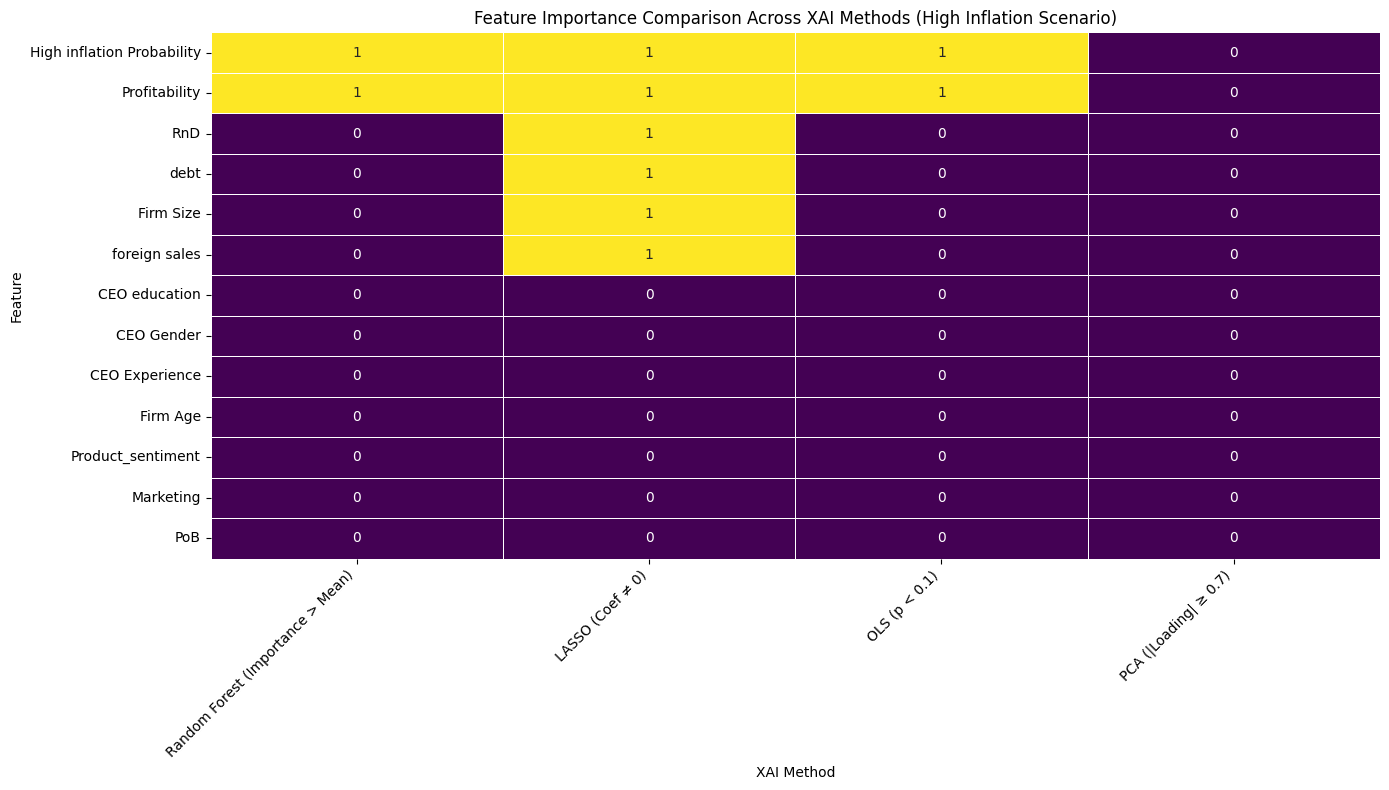

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# --- 1. Load Data and Define Features/Target for High Inflation ---
excel_file_path = '/content/cw4 high inflation .xlsx' # Corrected path for High Inflation data
df = pd.read_excel(excel_file_path)

feature_cols = ['Profitability', 'High inflation Probability', 'debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X = df[feature_cols]
y = df['New Profit'] # Target for High Inflation scenario

# --- 2. Random Forest Model and Feature Importance ---
# Split data for Random Forest (needed to train the model for feature importances)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_rf, y_train_rf)

rf_importance_series = pd.Series(model_rf.feature_importances_, index=X.columns)
mean_importance_rf = rf_importance_series.mean()
rf_important_features = rf_importance_series[rf_importance_series > mean_importance_rf].index.tolist()

# --- 3. LASSO Regression and Feature Selection ---
lasso = Lasso(alpha=0.1, random_state=42) # Using alpha=0.1 as in previous analysis
lasso.fit(X, y)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
lasso_important_features = lasso_coefficients[lasso_coefficients != 0].index.tolist()

# --- 4. OLS Regression and Statistical Significance ---
X_ols = sm.add_constant(X)
model_ols = sm.OLS(y, X_ols)
results_ols = model_ols.fit(cov_type='HC1') # Using robust standard errors as in previous analysis

ols_pvalues = results_ols.pvalues
ols_important_features = ols_pvalues[ols_pvalues < 0.1].index.tolist()
if 'const' in ols_important_features:
    ols_important_features.remove('const')

# --- 5. PCA and Loading Factors ---
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X)

pca = PCA()
X_pca_transformed = pca.fit_transform(X_pca_scaled)

loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)
abs_loading = loading_factors.abs()
max_loading_per_feature = pd.DataFrame({
    'Highest Absolute Loading': abs_loading.max(axis=1),
    'Principal Component (PC)': abs_loading.idxmax(axis=1)
})
# This is the corrected line - filtering for >= 0.7
pca_important_features = max_loading_per_feature[max_loading_per_feature['Highest Absolute Loading'] >= 0.7].index.tolist()

# --- 6. Create Comparison Table ---
# Ensure all features from feature_cols are included in the comparison table
all_features = sorted(list(set(feature_cols))) # Use all original feature_cols here

xai_comparison_table = pd.DataFrame(index=all_features)
xai_comparison_table['Random Forest (Importance > Mean)'] = xai_comparison_table.index.isin(rf_important_features)
xai_comparison_table['LASSO (Coef ≠ 0)'] = xai_comparison_table.index.isin(lasso_important_features)
xai_comparison_table['OLS (p < 0.1)'] = xai_comparison_table.index.isin(ols_important_features)
xai_comparison_table['PCA (|Loading| ≥ 0.7)'] = xai_comparison_table.index.isin(pca_important_features)

# Calculate Score
xai_comparison_table['Score'] = xai_comparison_table.sum(axis=1)

# Sort by Score in descending order
xai_comparison_table = xai_comparison_table.sort_values(by='Score', ascending=False)

print("Explainable AI (XAI) Comparison Table for 'New Profit' (High Inflation Scenario):")
display(xai_comparison_table)

# --- Create and display the bar chart ---
# Convert boolean values to integers (True=1, False=0) for plotting
xai_comparison_table_numeric = xai_comparison_table.drop('Score', axis=1).astype(int)

plt.figure(figsize=(14, 8))
sns.heatmap(xai_comparison_table_numeric, annot=True, cmap='viridis', cbar=False, fmt='d', linewidths=.5)
plt.title('Feature Importance Comparison Across XAI Methods (High Inflation Scenario)')
plt.xlabel('XAI Method')
plt.ylabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

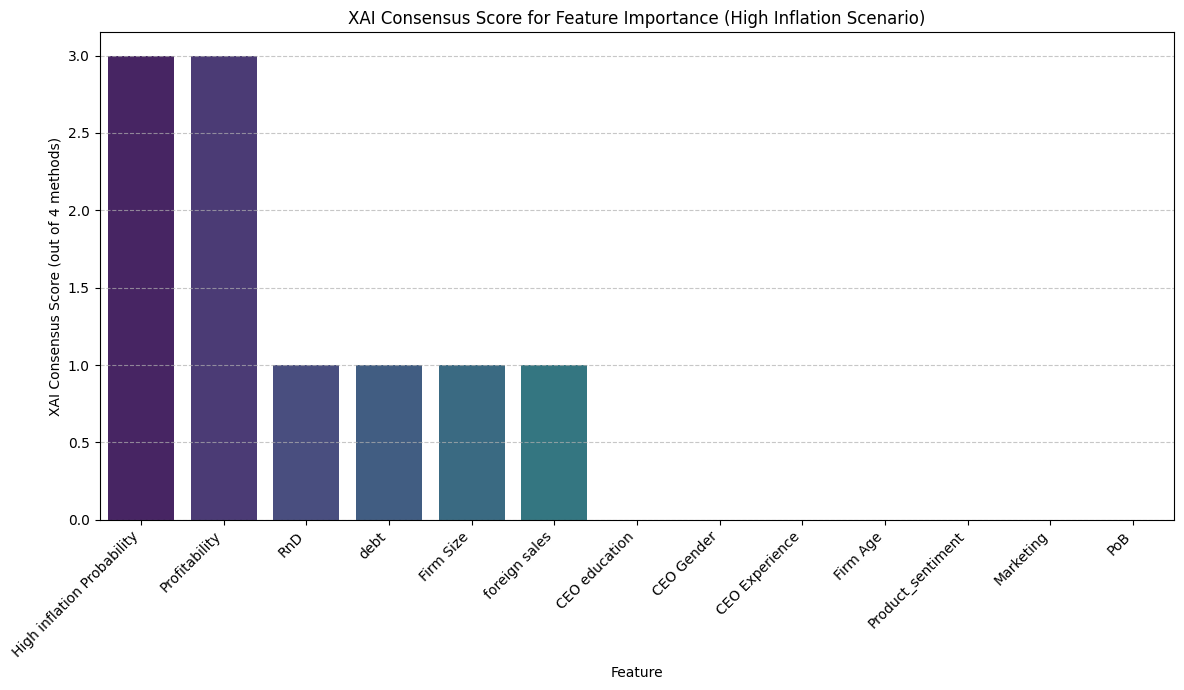

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the xai_comparison_table by 'Score' in descending order
sorted_xai_table_high_inflation = xai_comparison_table.sort_values(by='Score', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=sorted_xai_table_high_inflation.index, y=sorted_xai_table_high_inflation['Score'], hue=sorted_xai_table_high_inflation.index, palette='viridis', legend=False)
plt.title('XAI Consensus Score for Feature Importance (High Inflation Scenario)')
plt.xlabel('Feature')
plt.ylabel('XAI Consensus Score (out of 4 methods)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3393144794.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances_high_inflation.index, y=sorted_feature_importances_high_inflation.values, palette='viridis')


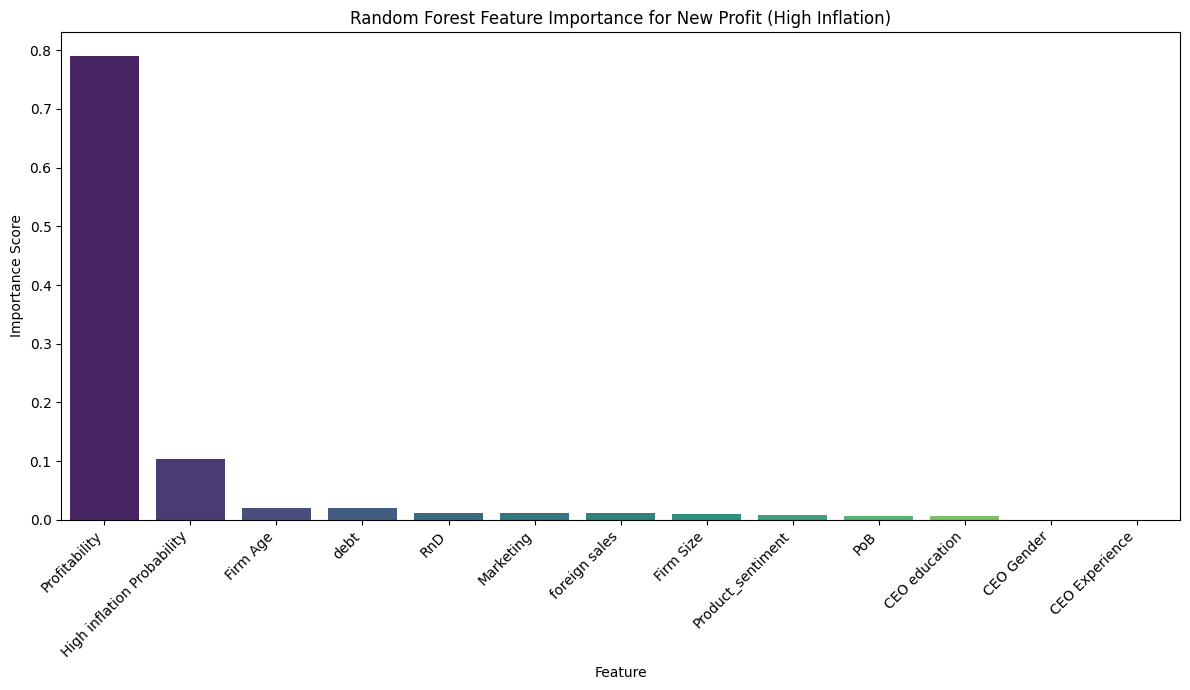

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# --- Re-run necessary steps to define sorted_feature_importances_high_inflation ---
excel_file_path = '/content/cw4 high inflation .xlsx' # Corrected path
df = pd.read_excel(excel_file_path)

feature_cols_high_inflation = ['Profitability', 'High inflation Probability', 'debt', 'RnD', 'Firm Age','Firm Size','CEO Experience', 'foreign sales', 'CEO education',  'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_high_inflation = df[feature_cols_high_inflation]
y_high_inflation = df['New Profit']

X_train_high_inflation, X_test_high_inflation, y_train_high_inflation, y_test_high_inflation = train_test_split(
    X_high_inflation, y_high_inflation, test_size=0.2, random_state=42
)

model_high_inflation = RandomForestRegressor(n_estimators=100, random_state=42)
model_high_inflation.fit(X_train_high_inflation, y_train_high_inflation)

feature_importances_high_inflation = model_high_inflation.feature_importances_
sorted_feature_importances_high_inflation = pd.Series(feature_importances_high_inflation, index=X_high_inflation.columns).sort_values(ascending=False)
# --- End of re-run steps ---

plt.figure(figsize=(12, 7))
sns.barplot(x=sorted_feature_importances_high_inflation.index, y=sorted_feature_importances_high_inflation.values, palette='viridis')
plt.title('Random Forest Feature Importance for New Profit (High Inflation)')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Good Economy


In [ ]:
import pandas as pd
excel_file_path = '/content/sample_data/good economy cw4.xlsx'
df = pd.read_excel(excel_file_path)
print(df.columns)

Index(['id', 'Profitability', 'Good Economy Probability', 'New Profit', 'debt',
       'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales',
       'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment',
       'Politicans', 'PoB'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load the dataframe
excel_file_path = '/content/sample_data/good economy cw4.xlsx' # Updated file path
df = pd.read_excel(excel_file_path)

# Define features (X) and target (y)
# Update feature columns to match the 'good economy' dataset, removing 'High inflation Probability'
feature_cols_good_economy = ['Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education',  'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_good_economy = df[feature_cols_good_economy]
y_good_economy = df['New Profit']

# Split data into training and testing sets (80/20 rule)
X_train_good_economy, X_test_good_economy, y_train_good_economy, y_test_good_economy = train_test_split(
    X_good_economy, y_good_economy, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model
model_good_economy = RandomForestRegressor(n_estimators=100, random_state=42)
model_good_economy.fit(X_train_good_economy, y_train_good_economy)

# Make predictions on the test set
y_pred_good_economy = model_good_economy.predict(X_test_good_economy)

# Evaluate the model
mae_good_economy = mean_absolute_error(y_test_good_economy, y_pred_good_economy)
mse_good_economy = mean_squared_error(y_test_good_economy, y_pred_good_economy)
r2_good_economy = r2_score(y_test_good_economy, y_pred_good_economy)

print(f"Random Forest Model Evaluation for 'New Profit' (Good Economy Data):")
print(f"Mean Absolute Error (MAE): {mae_good_economy:.2f}")
print(f"Mean Squared Error (MSE): {mse_good_economy:.2f}")
print(f"R-squared (R2): {r2_good_economy:.2f}")

Random Forest Model Evaluation for 'New Profit' (Good Economy Data):
Mean Absolute Error (MAE): 1.62
Mean Squared Error (MSE): 6.99
R-squared (R2): 0.94


In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances_good_economy = model_good_economy.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_good_economy = pd.Series(feature_importances_good_economy, index=X_good_economy.columns)

# Sort the features by importance
sorted_feature_importances_good_economy = feature_importance_series_good_economy.sort_values(ascending=False)

# Print the feature importance scores
print("Random Forest Feature Importances for 'New Profit' (Good Economy Data):")
display(sorted_feature_importances_good_economy)

Random Forest Feature Importances for 'New Profit' (Good Economy Data):


,0
Profitability,0.926775
RnD,0.014331
Firm Size,0.013964
debt,0.009275
Product_sentiment,0.009039
Marketing,0.008227
Firm Age,0.008133
foreign sales,0.005212
PoB,0.002971
CEO education,0.000970


In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd

# Assuming df is already loaded from 'good economy cw4.xlsx'

# Define the features (X) and the target variable (y)
feature_cols_lasso_good_economy = ['Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_lasso_good_economy = df[feature_cols_lasso_good_economy]
y_lasso_good_economy = df['New Profit']

# Initialize and fit the LASSO model
# You might need to tune the alpha parameter based on your data
lasso_good_economy = Lasso(alpha=0.1, random_state=42) # alpha is the regularization strength
lasso_good_economy.fit(X_lasso_good_economy, y_lasso_good_economy)

# Get the coefficients
lasso_coefficients_good_economy = pd.Series(lasso_good_economy.coef_, index=X_lasso_good_economy.columns)

# Print the coefficients
print("LASSO Coefficients for 'New Profit' (Good Economy Data):")
display(lasso_coefficients_good_economy.sort_values(ascending=False))

LASSO Coefficients for 'New Profit' (Good Economy Data):


,0
Profitability,1.502664
Firm Size,0.176399
debt,0.004069
RnD,0.000921
Firm Age,0.000000
Product_sentiment,0.000000
Marketing,-0.000000
CEO Gender,-0.000000
PoB,-0.000000
foreign sales,-0.000775


In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd

# Assuming df is already loaded from 'good economy cw4.xlsx'

# Define the reduced set of features (X)
feature_cols_reduced_lasso_good_economy = ['Profitability', 'debt', 'RnD', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education']
X_reduced_lasso_good_economy = df[feature_cols_reduced_lasso_good_economy]
y_reduced_lasso_good_economy = df['New Profit']

# Initialize and fit the LASSO model with the reduced feature set
# You might need to tune the alpha parameter based on your data
lasso_reduced_good_economy = Lasso(alpha=0.1, random_state=42) # alpha is the regularization strength
lasso_reduced_good_economy.fit(X_reduced_lasso_good_economy, y_reduced_lasso_good_economy)

# Get the coefficients
lasso_coefficients_reduced_good_economy = pd.Series(lasso_reduced_good_economy.coef_, index=X_reduced_lasso_good_economy.columns)

# Print the coefficients
print("LASSO Coefficients for 'New Profit' (Reduced Features - Zero Coefficient Features Removed):")
display(lasso_coefficients_reduced_good_economy.sort_values(ascending=False))

LASSO Coefficients for 'New Profit' (Reduced Features - Zero Coefficient Features Removed):


,0
Profitability,1.502664
Firm Size,0.176399
debt,0.004069
RnD,0.000921
foreign sales,-0.000775
CEO Experience,-0.418585
CEO education,-0.714192


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load the dataframe for the 'good economy' section
excel_file_path = '/content/good economy cw4.xlsx' # Corrected file path
df_good_economy = pd.read_excel(excel_file_path)

# Define features (X) and target (y) based on the user's request
feature_cols_rf_good_economy = ['Profitability', 'debt', 'RnD', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education']
X_rf_good_economy = df_good_economy[feature_cols_rf_good_economy]
y_rf_good_economy = df_good_economy['New Profit']

# Split data into training and testing sets (80/20 rule)
X_train_rf_good_economy, X_test_rf_good_economy, y_train_rf_good_economy, y_test_rf_good_economy = train_test_split(
    X_rf_good_economy, y_rf_good_economy, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model
model_rf_good_economy = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_good_economy.fit(X_train_rf_good_economy, y_train_rf_good_economy)

# Get feature importances from the Random Forest model
feature_importances_rf_good_economy = model_rf_good_economy.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_rf_good_economy = pd.Series(
    feature_importances_rf_good_economy,
    index=X_rf_good_economy.columns
)

# Sort the features by importance
sorted_feature_importances_rf_good_economy = feature_importance_series_rf_good_economy.sort_values(ascending=False)

print(f"Random Forest Feature Importances (Good Economy Data - Features: {feature_cols_rf_good_economy}):")
display(sorted_feature_importances_rf_good_economy)

Random Forest Feature Importances (Good Economy Data - Features: ['Profitability', 'debt', 'RnD', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education']):


,0
Profitability,0.942769
Firm Size,0.018287
debt,0.016321
foreign sales,0.009273
RnD,0.008636
CEO education,0.003291
CEO Experience,0.001423


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataframe
excel_file_path = '/content/sample_data/good economy cw4.xlsx' # Updated file path
df = pd.read_excel(excel_file_path)

# Define the features (X) and the target variable (y)
# Update feature columns to match the 'good economy' dataset, removing 'High inflation Probability'
feature_cols_ols_good_economy = ['Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education',  'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_ols_good_economy = df[feature_cols_ols_good_economy]
y_ols_good_economy = df['New Profit']

# Add a constant (intercept) to the features
X_ols_good_economy = sm.add_constant(X_ols_good_economy)

# Create and fit the OLS model with robust standard errors
model_ols_good_economy = sm.OLS(y_ols_good_economy, X_ols_good_economy)
results_ols_good_economy = model_ols_good_economy.fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the summary of the regression results
print("OLS Regression Results for 'New Profit' (Good Economy Data, with Robust Standard Errors):")
print(results_ols_good_economy.summary())

OLS Regression Results for 'New Profit' (Good Economy Data, with Robust Standard Errors):
                            OLS Regression Results                            
Dep. Variable:             New Profit   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     106.5
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           2.16e-54
Time:                        06:09:22   Log-Likelihood:                -299.61
No. Observations:                 122   AIC:                             625.2
Df Residuals:                     109   BIC:                             661.7
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming df and results_ols_good_economy are available from previous steps

# Get OLS coefficients and p-values from the previous model
ols_pvalues_good_economy = results_ols_good_economy.pvalues

# Filter: keep only variables with p < 0.1
significant_vars_good_economy = ols_pvalues_good_economy[ols_pvalues_good_economy < 0.1].index.tolist()

# Remove the 'const' if it's included, as it's added separately
if 'const' in significant_vars_good_economy:
    significant_vars_good_economy.remove('const')

# Define the reduced set of features (X) based on the significant variables
X_ols_reduced_pvalue_good_economy = df[significant_vars_good_economy]
y_ols_reduced_pvalue_good_economy = df['New Profit'] # Target variable remains the same

# Add a constant (intercept) to the features
X_ols_reduced_pvalue_good_economy = sm.add_constant(X_ols_reduced_pvalue_good_economy)

# Create and fit the OLS model with robust standard errors using the reduced feature set
model_ols_reduced_pvalue_good_economy = sm.OLS(y_ols_reduced_pvalue_good_economy, X_ols_reduced_pvalue_good_economy)
results_ols_reduced_pvalue_good_economy = model_ols_reduced_pvalue_good_economy.fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the summary of the regression results
print("OLS Regression Results for 'New Profit' (Features with P < 0.1, Good Economy Data, with Robust Standard Errors):")
print(results_ols_reduced_pvalue_good_economy.summary())

OLS Regression Results for 'New Profit' (Features with P < 0.1, Good Economy Data, with Robust Standard Errors):
                            OLS Regression Results                            
Dep. Variable:             New Profit   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     199.5
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           4.87e-46
Time:                        06:13:38   Log-Likelihood:                -301.82
No. Observations:                 122   AIC:                             611.6
Df Residuals:                     118   BIC:                             622.8
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
--------------

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load the dataframe for the 'good economy' section
excel_file_path = '/content/good economy cw4.xlsx' # Corrected file path
df_good_economy = pd.read_excel(excel_file_path)

# Define features (X) and target (y) based on the user's request
feature_cols_rf_good_economy = ['Profitability','CEO Experience', 'CEO education']
X_rf_good_economy = df_good_economy[feature_cols_rf_good_economy]
y_rf_good_economy = df_good_economy['New Profit']

# Split data into training and testing sets (80/20 rule)
X_train_rf_good_economy, X_test_rf_good_economy, y_train_rf_good_economy, y_test_rf_good_economy = train_test_split(
    X_rf_good_economy, y_rf_good_economy, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model
model_rf_good_economy = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_good_economy.fit(X_train_rf_good_economy, y_train_rf_good_economy)

# Get feature importances from the Random Forest model
feature_importances_rf_good_economy = model_rf_good_economy.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_rf_good_economy = pd.Series(
    feature_importances_rf_good_economy,
    index=X_rf_good_economy.columns
)

# Sort the features by importance
sorted_feature_importances_rf_good_economy = feature_importance_series_rf_good_economy.sort_values(ascending=False)

print(f"Random Forest Feature Importances (Good Economy Data - Features: {feature_cols_rf_good_economy}):")
display(sorted_feature_importances_rf_good_economy)

Random Forest Feature Importances (Good Economy Data - Features: ['Profitability', 'CEO Experience', 'CEO education']):


,0
Profitability,0.993091
CEO Experience,0.003723
CEO education,0.003186


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Assuming df is already loaded from 'cw4 high inflation .xlsx'
# The user wants to use the 'good economy' data, so load that here:
excel_file_path = '/content/sample_data/good economy cw4.xlsx'
df = pd.read_excel(excel_file_path)

# Define the features for PCA
# Removed 'High inflation Probability' as it's not in the good economy dataset
feature_cols_pca_new = ['Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_pca_new = df[feature_cols_pca_new]

# Standardize the features
scaler_new = StandardScaler()
X_pca_scaled_new = scaler_new.fit_transform(X_pca_new)

# Perform PCA
pca_new = PCA()
X_pca_transformed_new = pca_new.fit_transform(X_pca_scaled_new)

# Get the loading factors
loading_factors_new = pd.DataFrame(pca_new.components_.T, columns=[f'PC{i+1}' for i in range(pca_new.n_components_)], index=feature_cols_pca_new)

# Display the loading factors
print("PCA Loading Factors (Good Economy Data):")
display(loading_factors_new)

PCA Loading Factors (Good Economy Data):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Profitability,0.465227,0.292698,-0.187358,-0.135756,-0.107122,0.021617,0.079341,0.164874,0.009444,0.474790,0.611078,0.002580
debt,-0.244327,-0.357409,0.017735,0.133637,0.560031,0.319906,-0.156583,-0.119367,-0.041766,0.508061,0.138660,-0.246072
RnD,0.245903,0.007238,0.116642,-0.439003,0.442389,0.226341,0.403467,-0.060368,-0.336917,-0.414907,0.109210,-0.148977
Firm Age,0.252366,-0.256545,0.539158,0.162237,-0.060450,-0.192721,-0.061921,-0.336563,0.402547,-0.205452,0.381480,-0.214004
Firm Size,0.249715,0.035547,0.337908,0.232278,-0.069918,0.427956,-0.470009,0.523139,-0.224391,-0.180432,-0.015584,-0.049757
CEO Experience,0.154334,0.352419,0.598988,0.082299,0.133037,-0.052655,0.204373,-0.168135,-0.117842,0.414774,-0.361987,0.280989
foreign sales,-0.113144,0.489837,-0.126155,0.282622,0.233104,-0.182171,-0.389701,-0.410050,-0.355298,-0.219980,0.260406,0.038697
CEO education,0.432903,-0.322883,-0.276173,0.203319,0.115397,0.252872,-0.045598,-0.270370,0.069641,-0.090771,-0.057568,0.649529
CEO Gender,0.512547,0.088645,-0.298319,0.222409,0.039635,-0.049950,-0.016067,-0.153651,0.051494,0.054442,-0.463093,-0.585640
Marketing,-0.069024,-0.222854,0.000220,0.570691,-0.291378,0.003689,0.512755,0.005008,-0.486477,0.010612,0.166648,-0.086502


In [ ]:
#Find max loading per feature
abs_loading = loading_factors_new.abs()

max_loading_per_feature = pd.DataFrame({
    'Highest Absolute Loading': abs_loading.max(axis=1),
    'Principal Component (PC)': abs_loading.idxmax(axis=1)
}).sort_values(by='Highest Absolute Loading', ascending=False)

print("Highest PCA Loading per Feature (Good Economy Data):")
display(max_loading_per_feature)

Highest PCA Loading per Feature (Good Economy Data):


,Highest Absolute Loading,Principal Component (PC)
PoB,0.706528,PC6
CEO education,0.649529,PC12
Profitability,0.611078,PC11
CEO Experience,0.598988,PC3
CEO Gender,0.585640,PC12
Marketing,0.570691,PC4
debt,0.560031,PC5
Firm Age,0.539158,PC3
Firm Size,0.523139,PC8
Product_sentiment,0.518231,PC9


In [ ]:
# Assuming max_loading_per_feature is available from previous steps

# Find features with highest absolute loading >= 0.7
important_pca_features_07 = max_loading_per_feature[max_loading_per_feature['Highest Absolute Loading'] >= 0.7]

# Find features with highest absolute loading > 0.5 and < 0.7
important_pca_features_05_to_07 = max_loading_per_feature[(max_loading_per_feature['Highest Absolute Loading'] >= 0.5) & (max_loading_per_feature['Highest Absolute Loading'] < 0.7)]

# Concatenate the two DataFrames, putting features >= 0.7 at the top
sorted_important_pca_features = pd.concat([important_pca_features_07, important_pca_features_05_to_07])

print("Features with Highest PCA Loading > 0.5 (with >= 0.7 at top, Good Economy Data):")
display(sorted_important_pca_features)

Features with Highest PCA Loading > 0.5 (with >= 0.7 at top, Good Economy Data):


,Highest Absolute Loading,Principal Component (PC)
PoB,0.706528,PC6
CEO education,0.649529,PC12
Profitability,0.611078,PC11
CEO Experience,0.598988,PC3
CEO Gender,0.585640,PC12
Marketing,0.570691,PC4
debt,0.560031,PC5
Firm Age,0.539158,PC3
Firm Size,0.523139,PC8
Product_sentiment,0.518231,PC9


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Load the dataframe for the 'good economy' section
excel_file_path = '/content/good economy cw4.xlsx' # Corrected file path
df = pd.read_excel(excel_file_path)

# Define the features for PCA (excluding target and irrelevant IDs)
feature_cols_pca_good_economy = ['Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_pca_good_economy = df[feature_cols_pca_good_economy]

# Standardize the features
scaler_good_economy = StandardScaler()
X_pca_scaled_good_economy = scaler_good_economy.fit_transform(X_pca_good_economy)

# Perform PCA
pca_good_economy = PCA()
X_pca_transformed_good_economy = pca_good_economy.fit_transform(X_pca_scaled_good_economy)

# Get the loading factors
loading_factors_good_economy = pd.DataFrame(pca_good_economy.components_.T, columns=[f'PC{i+1}' for i in range(pca_good_economy.n_components_)], index=feature_cols_pca_good_economy)

# Find max loading per feature
abs_loading_good_economy = loading_factors_good_economy.abs()

max_loading_per_feature_good_economy = pd.DataFrame({
    'Highest Absolute Loading': abs_loading_good_economy.max(axis=1),
    'Principal Component (PC)': abs_loading_good_economy.idxmax(axis=1)
}).sort_values(by='Highest Absolute Loading', ascending=False)

# Filter by loading strength (>= 0.7)
important_pca_features_good_economy_07 = max_loading_per_feature_good_economy[max_loading_per_feature_good_economy['Highest Absolute Loading'] >= 0.7]

print("Features with Highest PCA Loading >= 0.7 (Good Economy Data):")
display(important_pca_features_good_economy_07)

Features with Highest PCA Loading >= 0.7 (Good Economy Data):


,Highest Absolute Loading,Principal Component (PC)
PoB,0.706528,PC6


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load the dataframe for the 'good economy' section
excel_file_path = '/content/good economy cw4.xlsx' # Corrected file path
df_good_economy = pd.read_excel(excel_file_path)

# Define features (X) and target (y) based on the user's request
feature_cols_rf_good_economy = ['PoB']
X_rf_good_economy = df_good_economy[feature_cols_rf_good_economy]
y_rf_good_economy = df_good_economy['New Profit']

# Split data into training and testing sets (80/20 rule)
X_train_rf_good_economy, X_test_rf_good_economy, y_train_rf_good_economy, y_test_rf_good_economy = train_test_split(
    X_rf_good_economy, y_rf_good_economy, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model
model_rf_good_economy = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_good_economy.fit(X_train_rf_good_economy, y_train_rf_good_economy)

# Get feature importances from the Random Forest model
feature_importances_rf_good_economy = model_rf_good_economy.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_rf_good_economy = pd.Series(
    feature_importances_rf_good_economy,
    index=X_rf_good_economy.columns
)

# Sort the features by importance
sorted_feature_importances_rf_good_economy = feature_importance_series_rf_good_economy.sort_values(ascending=False)

print(f"Random Forest Feature Importances (Good Economy Data - Features: {feature_cols_rf_good_economy}):")
display(sorted_feature_importances_rf_good_economy)

Random Forest Feature Importances (Good Economy Data - Features: ['PoB']):


,0
PoB,1.0


Custom Explainable AI (XAI) Comparison Table for 'New Profit' (Good Economy Scenario):


,Random Forest (Importance > Mean),LASSO (Coef ≠ 0),OLS (p < 0.1),PCA (|Loading| ≥ 0.7),Score
CEO Experience,False,True,True,False,2
CEO Gender,False,False,False,False,0
CEO education,False,True,True,False,2
Firm Age,False,False,False,False,0
Firm Size,False,True,False,False,1
Marketing,False,False,False,False,0
PoB,False,False,False,True,1
Product_sentiment,False,False,False,False,0
Profitability,True,True,True,False,3
RnD,False,True,False,False,1


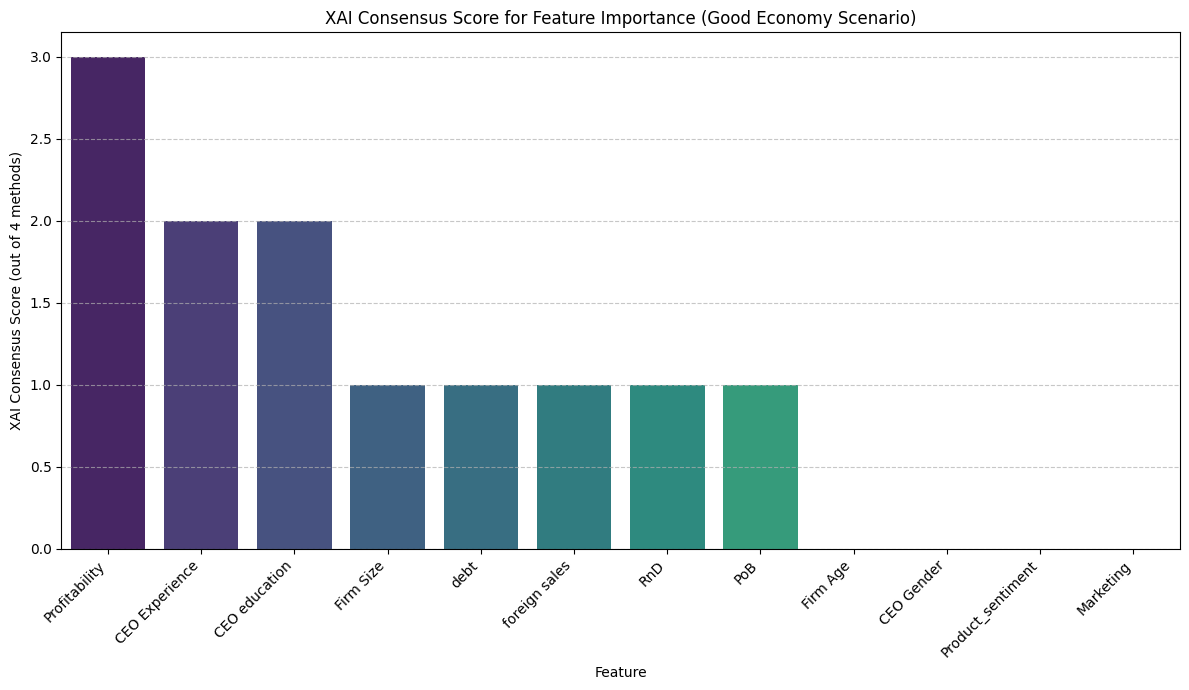

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define all possible features for the Good Economy scenario (from previous analysis)
all_features_good_economy = [
    'Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size',
    'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender',
    'Marketing', 'Product_sentiment', 'PoB'
]

# Define important features for each method based on your specific input:

# Random Forest (Importance > Mean) - based on our previous RF analysis for Good Economy
# (from rf_important_features_good_economy in cell 2zGJqmoonkYX, which was ['Profitability'])
rf_important_features_user = ['Profitability']

# LASSO (Coef ≠ 0) - as provided by you
lasso_important_features_user = [
    'Profitability', 'Firm Size', 'debt', 'RnD', 'foreign sales',
    'CEO Experience', 'CEO education'
]

# OLS (p < 0.1) - as provided by you
ols_important_features_user = [
    'Profitability', 'CEO Experience', 'CEO education'
]

# PCA (|Loading| ≥ 0.7) - as provided by you
pca_important_features_user = ['PoB']

# Create the XAI comparison table DataFrame
xai_comparison_table = pd.DataFrame(index=sorted(all_features_good_economy))

xai_comparison_table['Random Forest (Importance > Mean)'] = xai_comparison_table.index.isin(rf_important_features_user)
xai_comparison_table['LASSO (Coef ≠ 0)'] = xai_comparison_table.index.isin(lasso_important_features_user)
xai_comparison_table['OLS (p < 0.1)'] = xai_comparison_table.index.isin(ols_important_features_user)
xai_comparison_table['PCA (|Loading| ≥ 0.7)'] = xai_comparison_table.index.isin(pca_important_features_user)

# Calculate the consensus score
xai_comparison_table['Score'] = xai_comparison_table.sum(axis=1)

# Sort by score for better visualization
sorted_xai_table = xai_comparison_table.sort_values(by='Score', ascending=False)

print("Custom Explainable AI (XAI) Comparison Table for 'New Profit' (Good Economy Scenario):")
display(xai_comparison_table)

# Create and display the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=sorted_xai_table.index, y=sorted_xai_table['Score'], hue=sorted_xai_table.index, palette='viridis', legend=False)
plt.title('XAI Consensus Score for Feature Importance (Good Economy Scenario)')
plt.xlabel('Feature')
plt.ylabel('XAI Consensus Score (out of 4 methods)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1974014978.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances_good_economy.index, y=sorted_feature_importances_good_economy.values, palette='viridis')


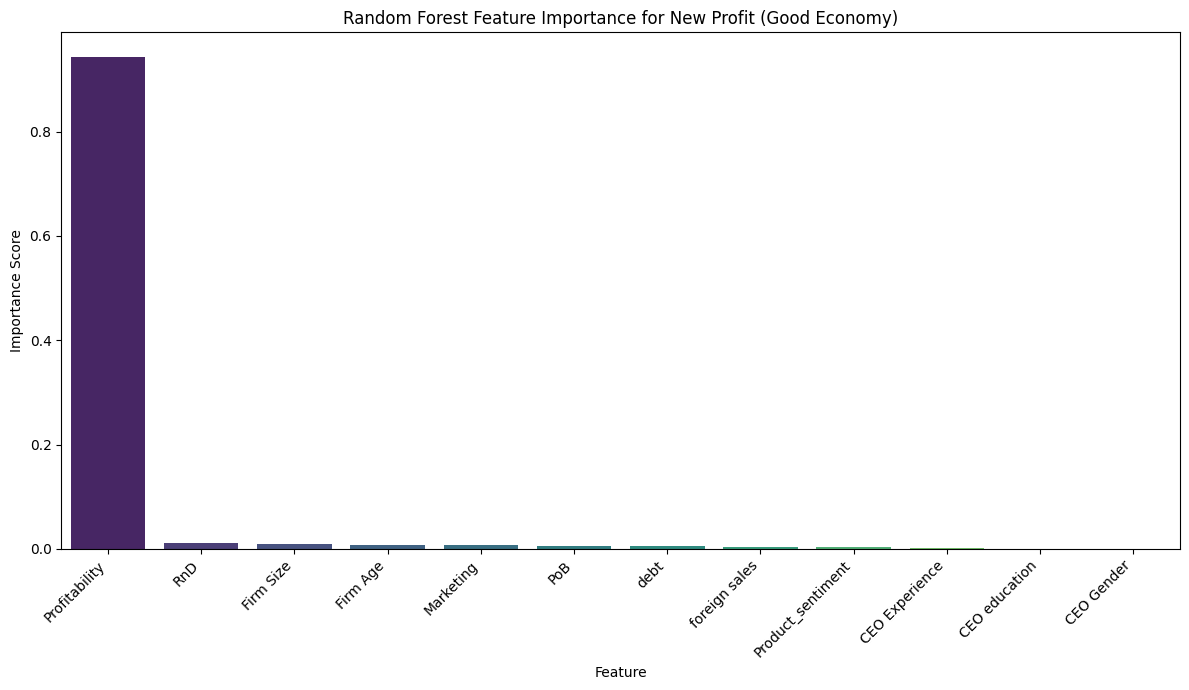

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# --- Re-run necessary steps to define sorted_feature_importances_good_economy ---
excel_file_path = '/content/good economy cw4.xlsx' # Path that worked previously
df = pd.read_excel(excel_file_path)

feature_cols_good_economy = ['Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education',  'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_good_economy = df[feature_cols_good_economy]
y_good_economy = df['New Profit']

X_train_good_economy, X_test_good_economy, y_train_good_economy, y_test_good_economy = train_test_split(
    X_good_economy, y_good_economy, test_size=0.2, random_state=42
)

model_good_economy = RandomForestRegressor(n_estimators=100, random_state=42)
model_good_economy.fit(X_train_good_economy, y_train_good_economy)

feature_importances_good_economy = model_good_economy.feature_importances_
sorted_feature_importances_good_economy = pd.Series(feature_importances_good_economy, index=X_good_economy.columns).sort_values(ascending=False)
# --- End of re-run steps ---

plt.figure(figsize=(12, 7))
sns.barplot(x=sorted_feature_importances_good_economy.index, y=sorted_feature_importances_good_economy.values, palette='viridis')
plt.title('Random Forest Feature Importance for New Profit (Good Economy)')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

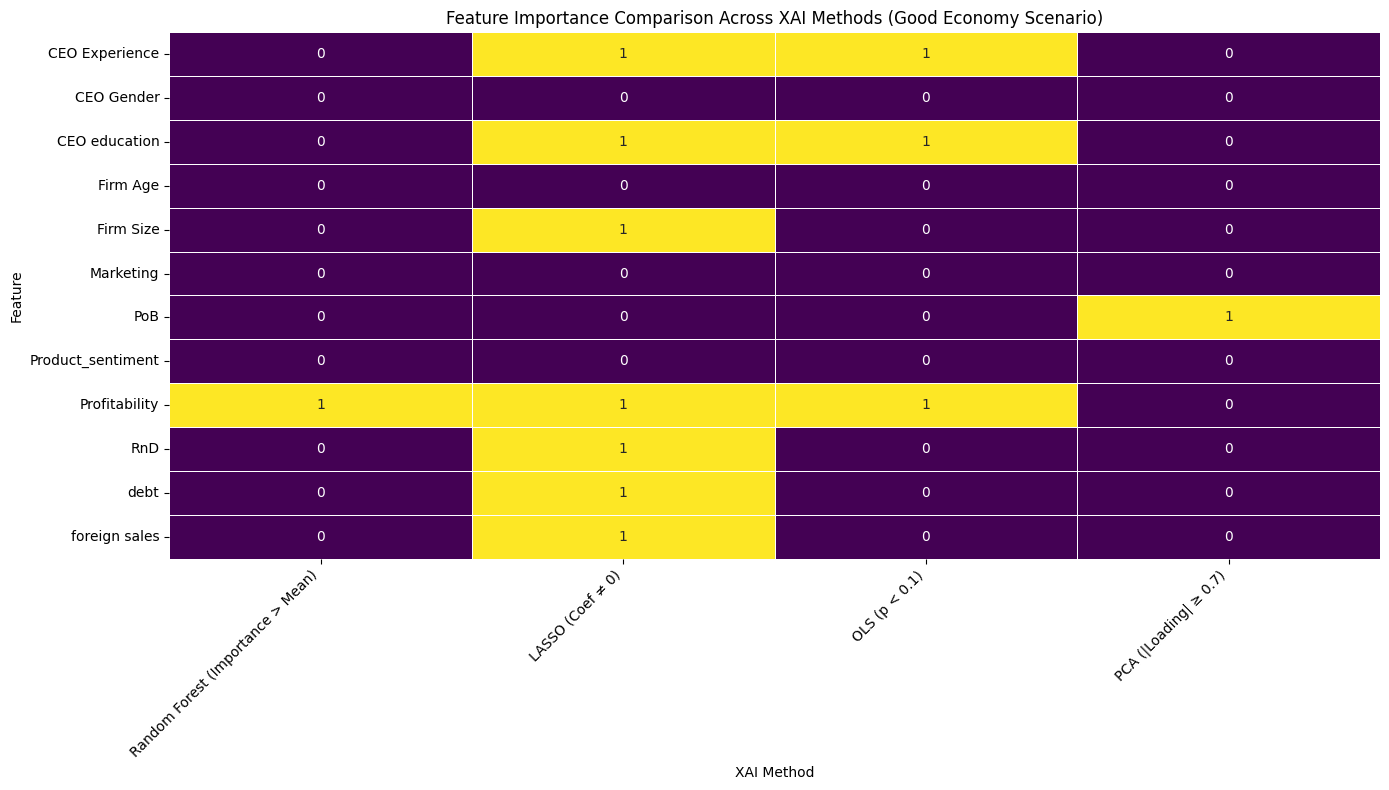

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming xai_comparison_table is available from the previous step

# Convert boolean values to integers (True=1, False=0) for plotting
xai_comparison_table_numeric = xai_comparison_table.drop('Score', axis=1).astype(int)

plt.figure(figsize=(14, 8))
sns.heatmap(xai_comparison_table_numeric, annot=True, cmap='viridis', cbar=False, fmt='d', linewidths=.5)
plt.title('Feature Importance Comparison Across XAI Methods (Good Economy Scenario)')
plt.xlabel('XAI Method')
plt.ylabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

📊 Scenario Comparison Summary:


,Scenario,R-squared,Top 3 Important Features
0,Original (Profitability),-1.443745,"debt, CEO Gender, Firm Size"
1,High Inflation (New Profit),0.901196,"Profitability, High inflation Probability, Fir..."
2,Good Economy (New Profit),0.942087,"Profitability, RnD, Firm Size"


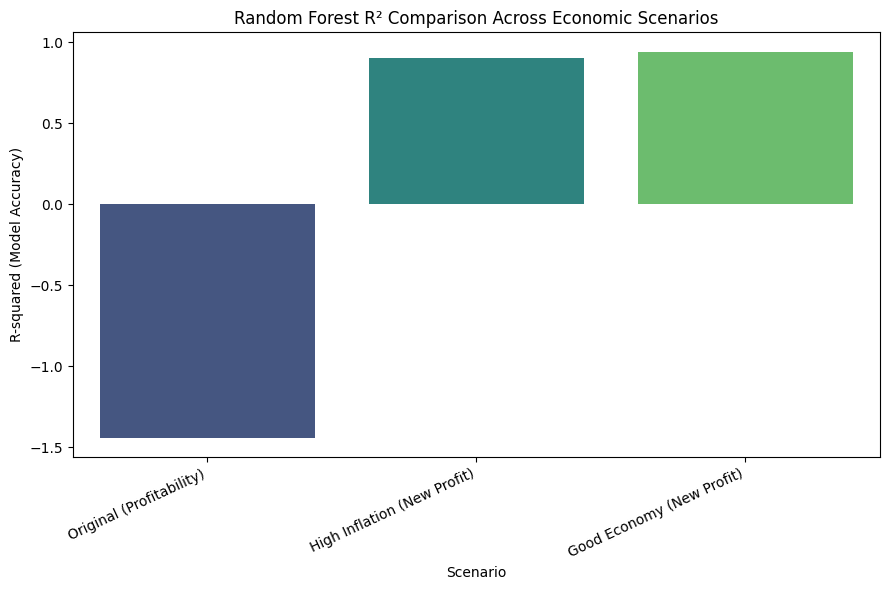

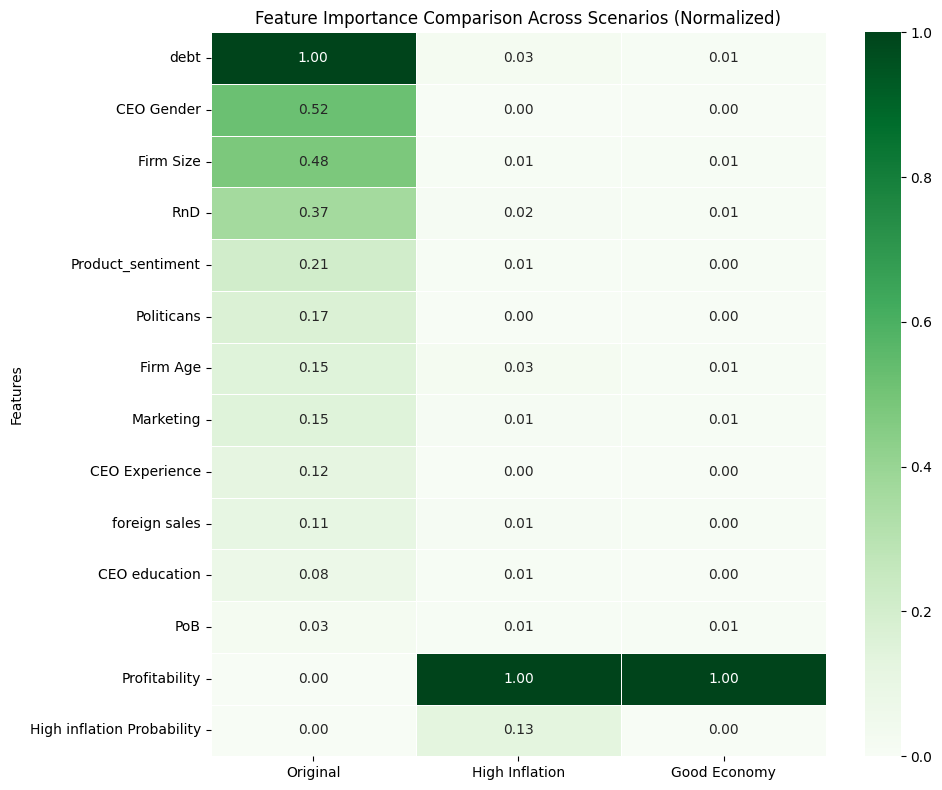

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# ========== 1️⃣ ORIGINAL SCENARIO (Predicting Profitability) ==========
excel_original = '/content/MSCI151 coursework 4 new Data.new.xlsx' # Confirmed correct path
df_original = pd.read_excel(excel_original)

X_original = df_original[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience',
                          'foreign sales', 'CEO education', 'CEO Gender', 'Marketing',
                          'Product_sentiment', 'Politicans', 'PoB']]
y_original = df_original['Profitability']

X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
model_o = RandomForestRegressor(n_estimators=100, random_state=42)
model_o.fit(X_train_o, y_train_o)
y_pred_o = model_o.predict(X_test_o)
r2_o = r2_score(y_test_o, y_pred_o)

rf_importance_o = pd.Series(model_o.feature_importances_, index=X_original.columns)
top3_o = rf_importance_o.sort_values(ascending=False).head(3).index.tolist()

# ========== 2️⃣ HIGH INFLATION SCENARIO (Predicting New Profit) ==========
excel_high = '/content/cw4 high inflation .xlsx' # Corrected path
df_high = pd.read_excel(excel_high)

X_high = df_high[['Profitability','High inflation Probability','debt','RnD',
                  'Firm Age','Firm Size','CEO Experience','foreign sales',
                  'CEO education','CEO Gender','Marketing','Product_sentiment','PoB']]
y_high = df_high['New Profit']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_high, y_high, test_size=0.2, random_state=42)
model_h = RandomForestRegressor(n_estimators=100, random_state=42)
model_h.fit(X_train_h, y_train_h)
y_pred_h = model_h.predict(X_test_h)
r2_h = r2_score(y_test_h, y_pred_h)

rf_importance_h = pd.Series(model_h.feature_importances_, index=X_high.columns)
top3_h = rf_importance_h.sort_values(ascending=False).head(3).index.tolist()

# ========== 3️⃣ GOOD ECONOMY SCENARIO (Predicting New Profit) ==========
excel_good = '/content/good economy cw4.xlsx' # Corrected path
df_good = pd.read_excel(excel_good)

X_good = df_good[['Profitability','debt','RnD','Firm Age','Firm Size',
                  'CEO Experience','foreign sales','CEO education','CEO Gender',
                  'Marketing','Product_sentiment','PoB']]
y_good = df_good['New Profit']

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_good, y_good, test_size=0.2, random_state=42)
model_g = RandomForestRegressor(n_estimators=100, random_state=42)
model_g.fit(X_train_g, y_train_g)
y_pred_g = model_g.predict(X_test_g)
r2_g = r2_score(y_test_g, y_pred_g)

rf_importance_g = pd.Series(model_g.feature_importances_, index=X_good.columns)
top3_g = rf_importance_g.sort_values(ascending=False).head(3).index.tolist()

# ========== COMBINE RESULTS ==========
scenario_comparison = pd.DataFrame({
    'Scenario': ['Original (Profitability)', 'High Inflation (New Profit)', 'Good Economy (New Profit)'],
    'R-squared': [r2_o, r2_h, r2_g],
    'Top 3 Important Features': [', '.join(top3_o), ', '.join(top3_h), ', '.join(top3_g)]
})

print("📊 Scenario Comparison Summary:")
display(scenario_comparison)

# ========== VISUALIZE R² ==========
plt.figure(figsize=(9,6))
sns.barplot(x='Scenario', y='R-squared', data=scenario_comparison, palette='viridis', hue='Scenario', legend=False)
plt.title('Random Forest R² Comparison Across Economic Scenarios')
plt.ylabel('R-squared (Model Accuracy)')
plt.xlabel('Scenario')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

# ========== HEATMAP OF FEATURE IMPORTANCES ==========
# Combine all unique features for the heatmap index
all_features_heatmap = sorted(list(set(rf_importance_o.index.tolist() + rf_importance_h.index.tolist() + rf_importance_g.index.tolist())))

# Create a DataFrame for normalized importances
importance_df = pd.DataFrame(index=all_features_heatmap)

# Add normalized importances for each scenario
importance_df['Original'] = (rf_importance_o / rf_importance_o.max()).reindex(all_features_heatmap, fill_value=0)
importance_df['High Inflation'] = (rf_importance_h / rf_importance_h.max()).reindex(all_features_heatmap, fill_value=0)
importance_df['Good Economy'] = (rf_importance_g / rf_importance_g.max()).reindex(all_features_heatmap, fill_value=0)

# Sort features by importance in the 'Original' scenario for consistency, then 'High Inflation', then 'Good Economy'
# This helps visually group more important features together
importance_df = importance_df.sort_values(by=['Original', 'High Inflation', 'Good Economy'], ascending=False)

plt.figure(figsize=(10,8))
sns.heatmap(importance_df, cmap='Greens', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Feature Importance Comparison Across Scenarios (Normalized)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()